# Lab 5

## Go over the paper

Since this paper tries to implement binary logics using *riboswitches*. According to what the paper says:

* The *AND-1* riboswitch will cleave itself when both OBSs are bound.
* The *OR-1* riboswitch will not cleave itself when neither OBS is bound.
* We would expect that if the OBS is bound, the *YES-1* would be cleaved. If it is not bound, the riboswitch will not cleave itself.

## Grab sequences from the paper

1. YES-1
```
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
```

2. NOT-1
```
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
```

3. AND-1
```
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
```


4. OR-1
```
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
```

These sequences are extracted from the diagram.


## Fold RNA using `RNAfold` command

Download the required `RNAfold` tool locally. Download link can be find [here](https://www.tbi.univie.ac.at/RNA/index.html).

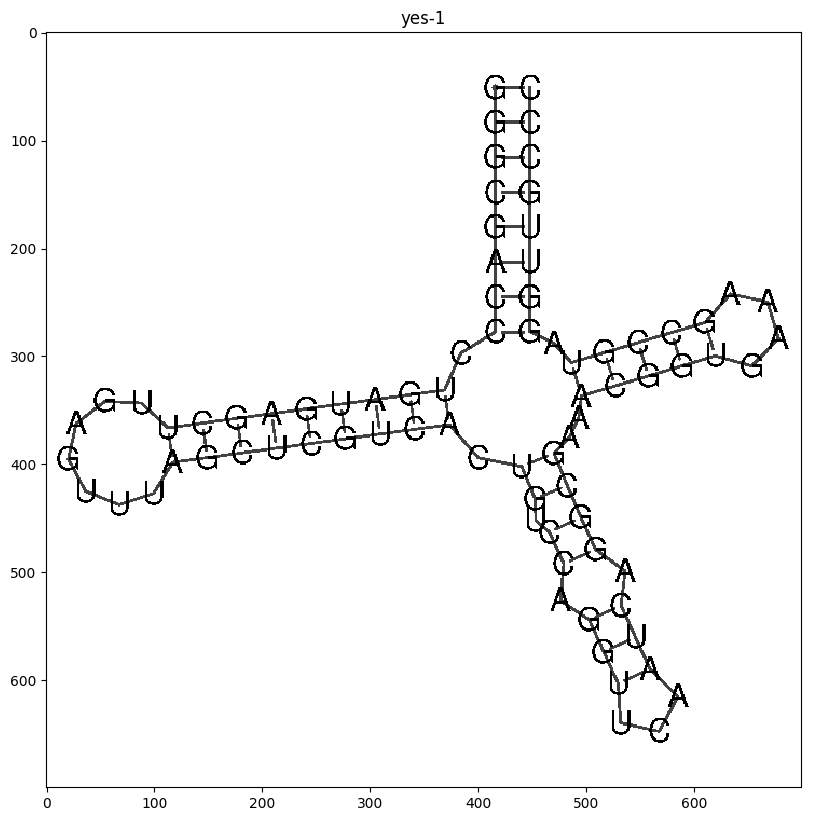

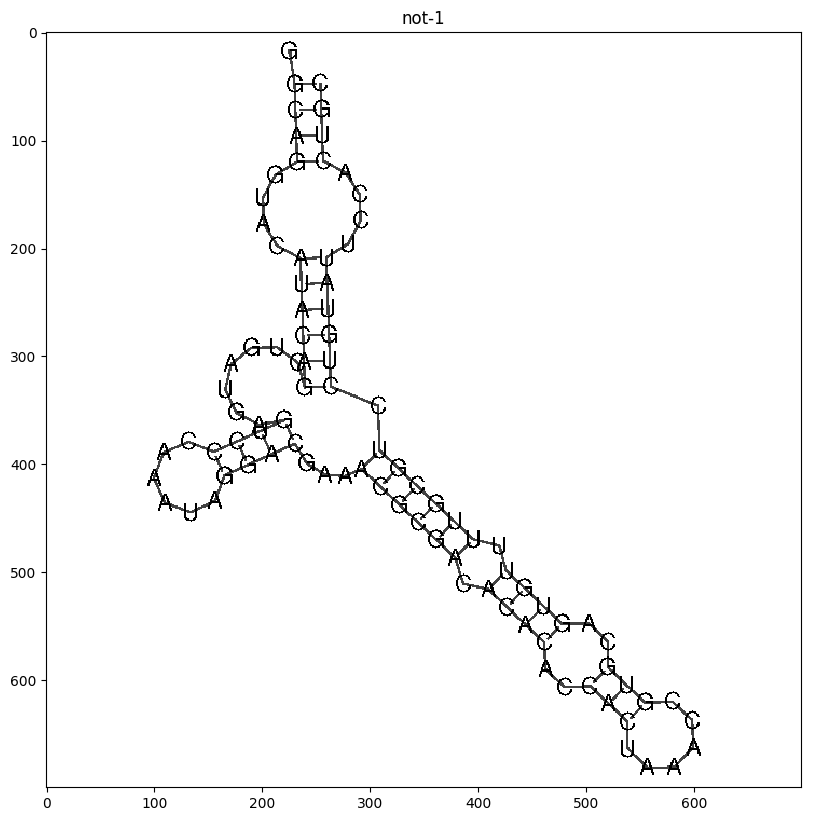

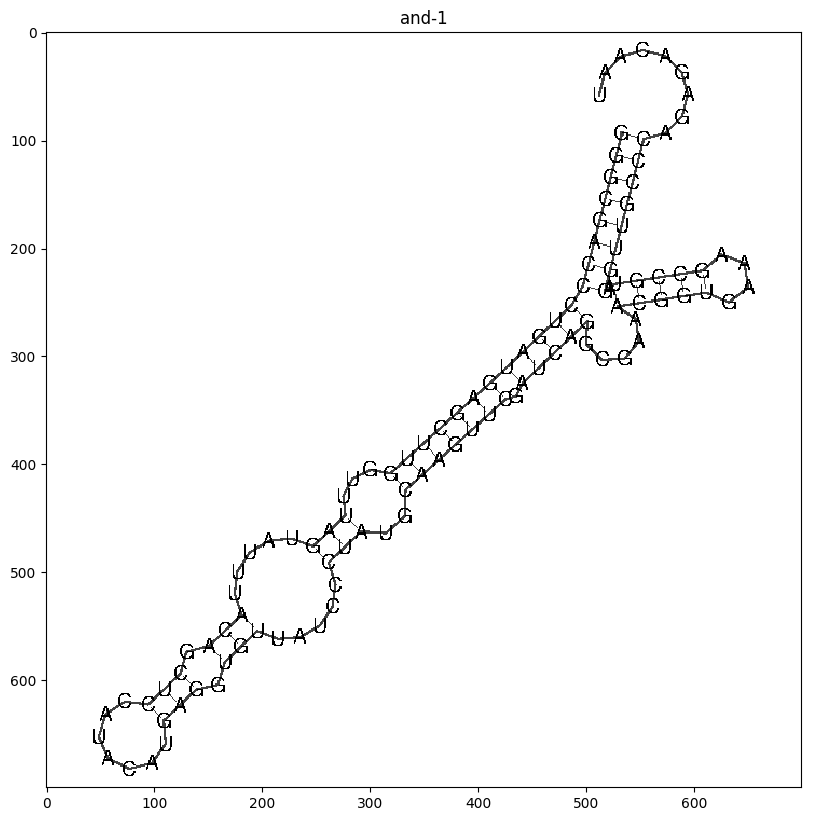

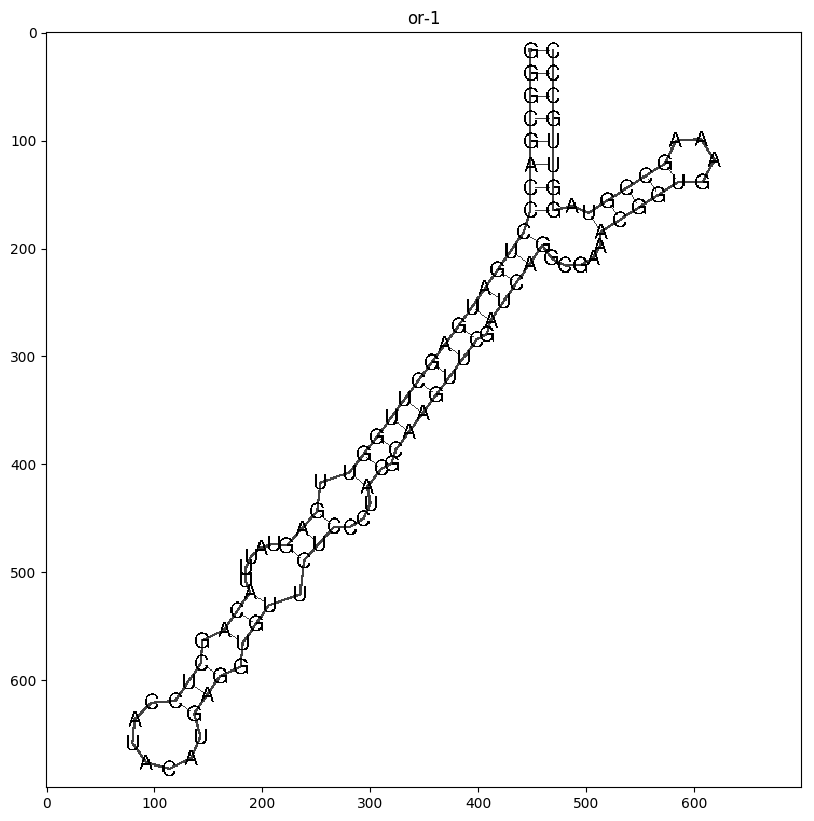

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import subprocess

# load riboswitch sequences
riboswt_dict = {}
riboswt_dict['yes-1'] = 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
riboswt_dict['not-1'] = 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC'
riboswt_dict['and-1'] = 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'
riboswt_dict['or-1'] = 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'

# generate a folding diagram for each riboswitch
for (riboswt, riboswt_seq) in riboswt_dict.items() :
    proc = subprocess.run(['RNAfold', '--id-prefix='+riboswt], input=bytes(riboswt_seq, 'ascii'),\
                         stdout=subprocess.PIPE, stderr=subprocess.PIPE,\
                         check=True)
    err_output = proc.stderr.decode()
    if err_output is not None :
        print(err_output)
    fig = plt.figure(figsize=(10,10), dpi=100)
    img = imageio.imread(riboswt+'_0001_ss.ps')
    plt.imshow(img)
    plt.title(riboswt)

According to the output *postscript* files, there are some significant differents:

1. In YES-1 riboswitch, our simulation has 1 more stems than the original paper.
2. For NOT-1 riboswitch, we both have 1 large stem and 1 small stem. However, the order of these stems are reversed (in the paper, the large stem is near 5', but in our simulation, it is near 3').
3. The stimulation for AND-1 perfectly matches the paper.
4. OR-1 perferctly matches as well

In [2]:
# generate the constraint, using . and x
def gen_constraint(pair_list, length) :
    start = 1
    constraint_str = ""
    for (index,pair) in enumerate(pair_list) :
        constraint_str += '.' * (pair[0] - start)
        constraint_str += 'x' * (pair[1] - pair[0])
        if index == len(pair_list) - 1 :
            constraint_str += '.' * (length - pair[1] + 1)
        else:
            start = pair[1]
    return constraint_str

riboswt_constraint = {}
# a list that store the coordinates of different forbidden position
constraint_list = [[(26,48)], [(44,67)], [(30,46),(49,65)], [(27,46),(47,67)]]
i = 0
for riboswt in riboswt_dict.keys() :
    riboswt_constraint[riboswt] = gen_constraint(constraint_list[i], len(riboswt_dict[riboswt]))
    i += 1

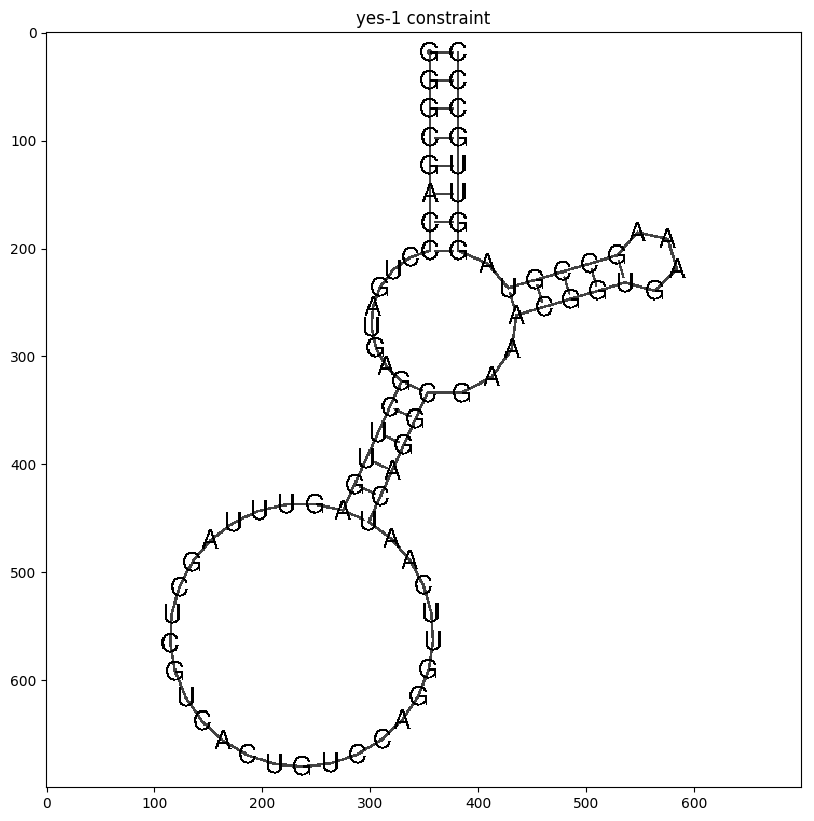

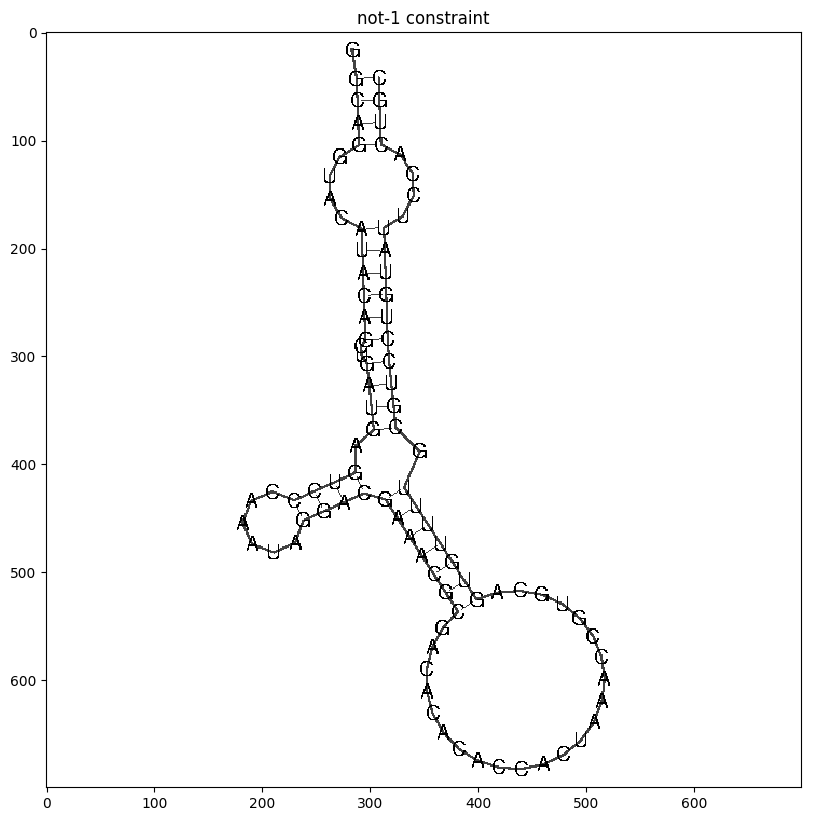

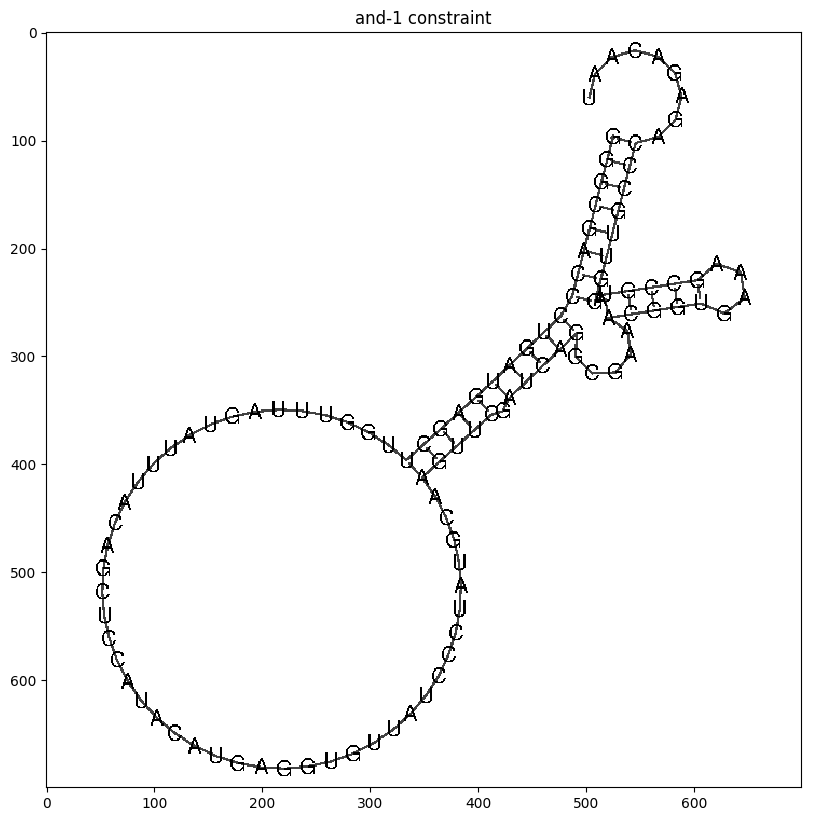

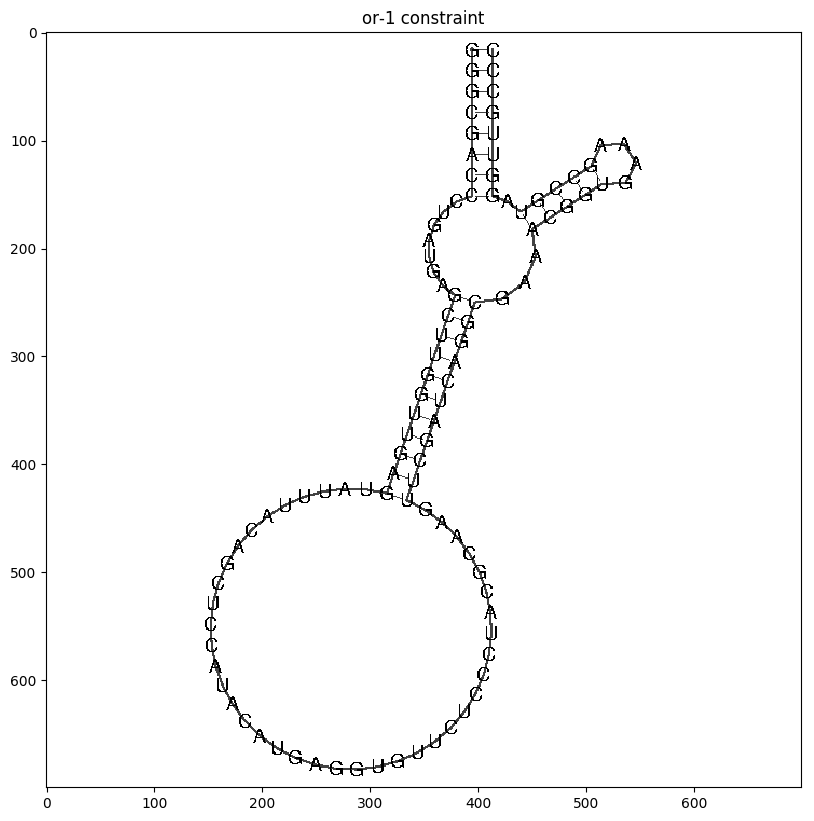

In [3]:
# generate a folding diagram, using constraint
for (riboswt, riboswt_seq) in riboswt_dict.items() :
    proc = subprocess.run(['RNAfold', '--id-prefix='+riboswt+'_constraint', '-C'],\
                         input=bytes(riboswt_seq+'\n'+riboswt_constraint[riboswt], 'ascii'),\
                         stdout=subprocess.PIPE, stderr=subprocess.PIPE,\
                         check=True)
    err_output = proc.stderr.decode()
    if err_output is not None :
        print(err_output)
    fig = plt.figure(figsize=(10,10), dpi=100)
    img = imageio.imread(riboswt+'_constraint_0001_ss.ps')
    plt.imshow(img)
    plt.title(riboswt+' constraint')

Diagrams above shows the YES1 and NOT-1 riboswitch when the OBS site is bind. The T/T binded (all possible OBSs are bounded) conformation of AND-1 and OR-1 are also demonstrated above.

According to the diagrams on the paper:

1. The binded YES-1 gate matches perfectly, as RNAfold command take G-U wobble pair as default.
2. NOT-1 folding matches the paper perfectly.
3. The T/T state of AND-1 folding basicly matches the paper, with 1 huge loop and a small stem. However, in this perdicted structure, the core hammerhead sequence "GCUUGGUU" do not form base pairs. I doubt that this would affect the cleavage efficiency.
4. OR-1 folding matches perfectly.

Text(0.5,1,'OR-1 constraint F/T')

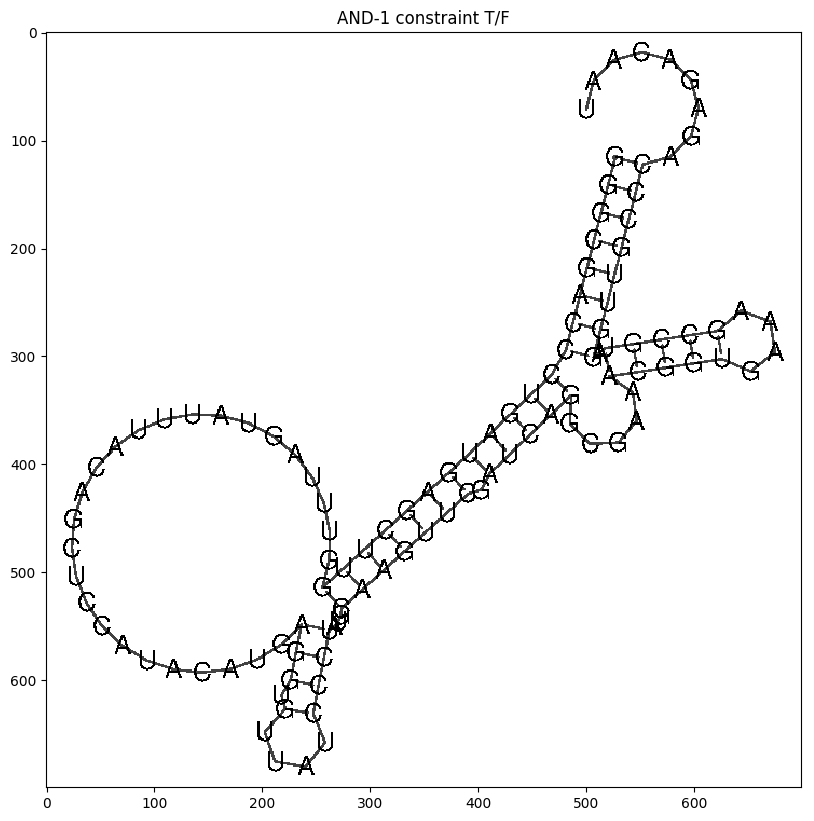

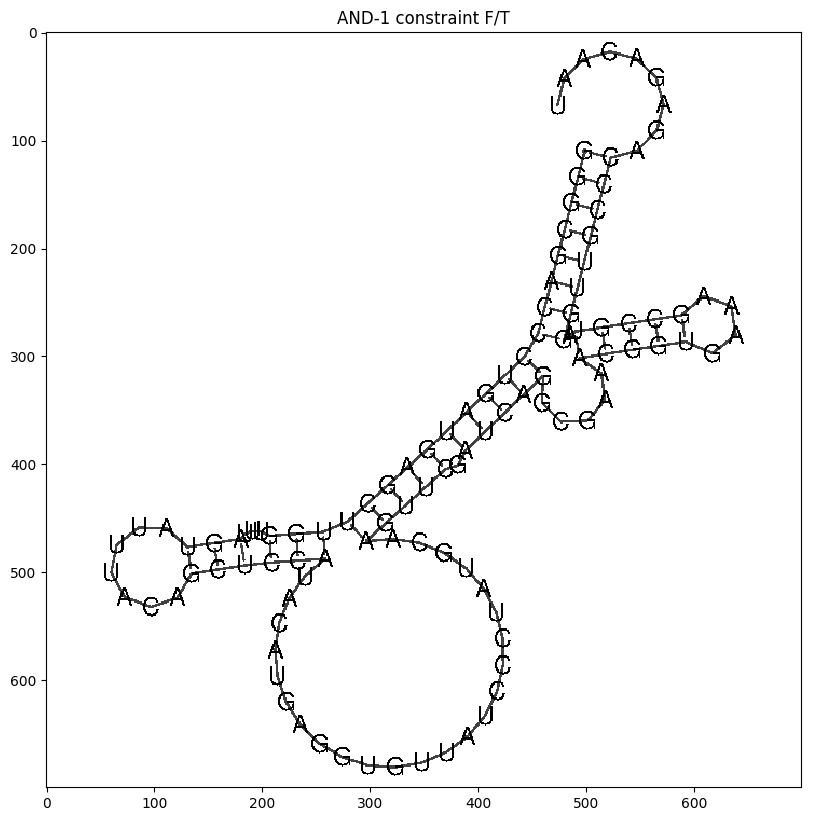

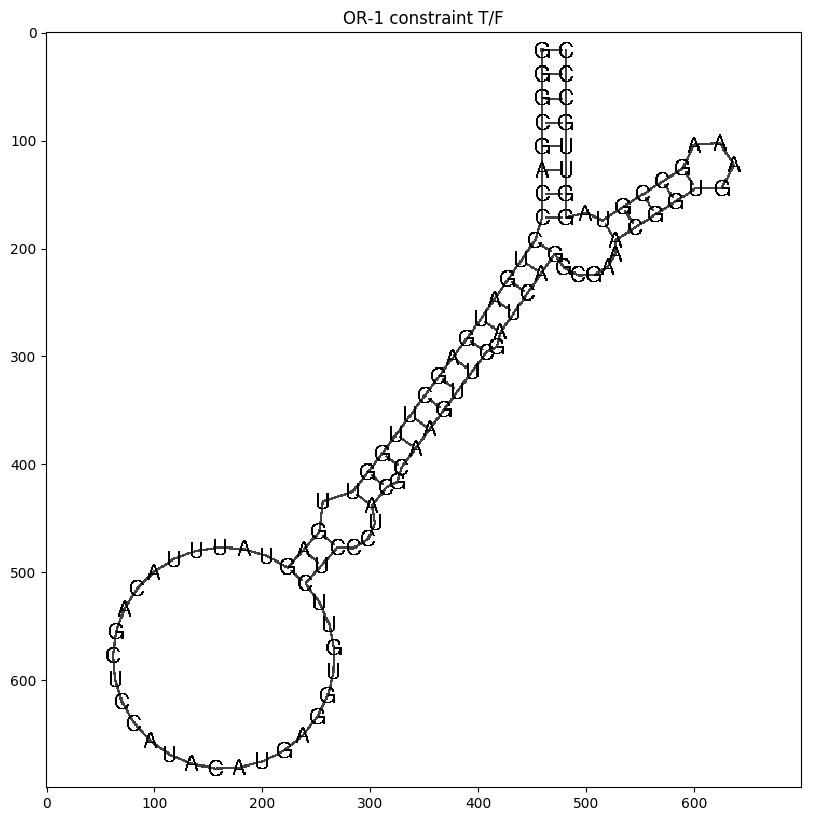

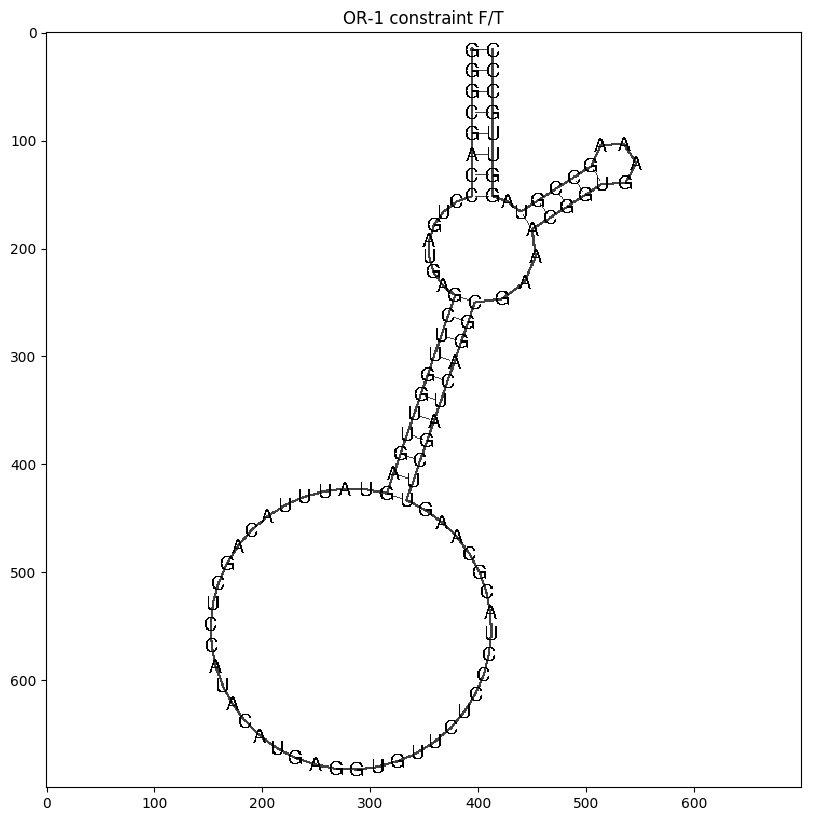

In [4]:
# draw T/F and F/T of and-1
[(30,46),(49,65)], [(27,46),(47,67)]
and_seq = riboswt_dict['and-1']
and_tf_constraint = gen_constraint([(30,46)], len(and_seq))
proc = subprocess.run(['RNAfold', '--id-prefix=and-1_constraint_TF', '-C'],\
                     input=bytes(and_seq+'\n'+and_tf_constraint, 'ascii'),\
                     stdout=subprocess.PIPE, stderr=subprocess.PIPE,\
                     check=True)
err_output = proc.stderr.decode()
if err_output is not None :
    print(err_output)
fig = plt.figure(figsize=(10,10), dpi=100)
img = imageio.imread('and-1_constraint_TF_0001_ss.ps')
plt.imshow(img)
plt.title('AND-1 constraint T/F')

and_ft_constraint = gen_constraint([(49,65)], len(and_seq))
proc = subprocess.run(['RNAfold', '--id-prefix=and-1_constraint_FT', '-C'],\
                     input=bytes(and_seq+'\n'+and_ft_constraint, 'ascii'),\
                     stdout=subprocess.PIPE, stderr=subprocess.PIPE,\
                     check=True)
err_output = proc.stderr.decode()
if err_output is not None :
    print(err_output)
fig = plt.figure(figsize=(10,10), dpi=100)
img = imageio.imread('and-1_constraint_FT_0001_ss.ps')
plt.imshow(img)
plt.title('AND-1 constraint F/T')

or_seq = riboswt_dict['or-1']
or_tf_constraint = gen_constraint([(27,46)], len(or_seq))
proc = subprocess.run(['RNAfold', '--id-prefix=or-1_constraint_TF', '-C'],\
                     input=bytes(or_seq+'\n'+or_tf_constraint, 'ascii'),\
                     stdout=subprocess.PIPE, stderr=subprocess.PIPE,\
                     check=True)
err_output = proc.stderr.decode()
if err_output is not None :
    print(err_output)
fig = plt.figure(figsize=(10,10), dpi=100)
img = imageio.imread('or-1_constraint_TF_0001_ss.ps')
plt.imshow(img)
plt.title('OR-1 constraint T/F')

or_ft_constraint = gen_constraint([(47,67)], len(or_seq))
proc = subprocess.run(['RNAfold', '--id-prefix=or-1_constraint_FT', '-C'],\
                     input=bytes(or_seq+'\n'+or_ft_constraint, 'ascii'),\
                     stdout=subprocess.PIPE, stderr=subprocess.PIPE,\
                     check=True)
err_output = proc.stderr.decode()
if err_output is not None :
    print(err_output)
fig = plt.figure(figsize=(10,10), dpi=100)
img = imageio.imread('or-1_constraint_FT_0001_ss.ps')
plt.imshow(img)
plt.title('OR-1 constraint F/T')

Here are my analysis:

1. The T/F state and the F/T state of AND-1 gate looks quite similar. For T/F state, two stems flanks the huge loop, which agrees with the paper. For F/T state, the paper has a folding of only 1 stem linking to the huge loop. However, since the core sequence GCUUGGUU pairs in neither of these structures, I assume both the folding structure in the paper and simulated here of F/T state won't trigger cleavage.
2. The 3 on states of OR-1 gate: T/T, T/F and F/T has exactly the same structure on the paper, which makes sense since they are all "on". In our simulation, the T/T state and F/T state is exactly the same, but the T/F state is a little different, which the huge loop shrinks a little. However, this leads to an imperfect basepair of GCUUGGUU core. It could reduce the cleavage ability.

In summary, according to the simulation here, both AND-1 and OR-1 do not work perfectly. YES-1 and NO-1 riboswitches work a litte better